In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
cvd=pd.read_csv(r"C:\Users\sajid1\Desktop\major\cvd-prediction-main\10dataset.csv")

In [3]:
cvd.head()

,id,age,gender,height,weight,ap_hi,ap_lo,Chol,gluc,smoke,alco,active,target
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,44,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
print('The dimensions are',cvd.shape)

The dimensions are (10000, 13)


In [5]:
cvd.isnull().any

<bound method DataFrame.any of          id    age  gender  height  weight  ap_hi  ap_lo   Chol   gluc  smoke  \
0     False  False   False   False   False  False  False  False  False  False   
1     False  False   False   False   False  False  False  False  False  False   
2     False  False   False   False   False  False  False  False  False  False   
3     False  False   False   False   False  False  False  False  False  False   
4     False  False   False   False   False  False  False  False  False  False   
...     ...    ...     ...     ...     ...    ...    ...    ...    ...    ...   
9995  False  False   False   False   False  False  False  False  False  False   
9996  False  False   False   False   False  False  False  False  False  False   
9997  False  False   False   False   False  False  False  False  False  False   
9998  False  False   False   False   False  False  False  False  False  False   
9999  False  False   False   False   False  False  False  False  False  False 

In [6]:
print(cvd.groupby('age').size())

age
30      1
39     67
40    421
41    105
42    354
43     89
44    422
45    108
46    433
47    112
48    446
49    164
50    737
51    190
52    744
53    179
54    887
55    202
56    846
57    194
58    858
59    196
60    784
61    161
62    552
63    156
64    538
65     54
dtype: int64


<AxesSubplot:xlabel='age', ylabel='count'>

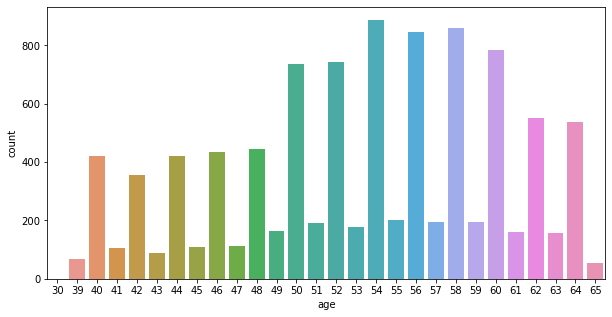

In [7]:
fig=plt.figure(figsize=(10,5))
sns.countplot(cvd['age'],label="count")

In [8]:
print(cvd.groupby('gender').size())

gender
1    6546
2    3454
dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

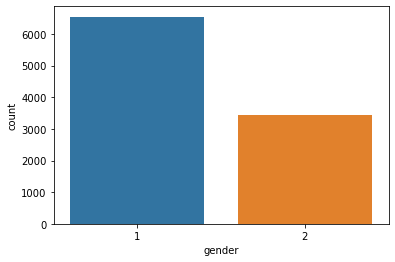

In [9]:
sns.countplot(cvd['gender'],label="count")

In [10]:
print(cvd.groupby('height').size())

height
70     1
76     1
97     1
100    1
117    1
      ..
194    2
195    2
196    3
198    3
250    1
Length: 71, dtype: int64


<AxesSubplot:xlabel='height', ylabel='count'>

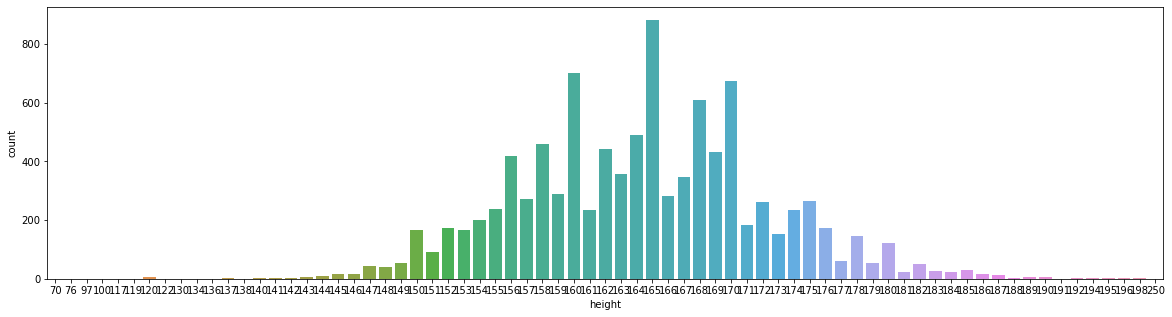

In [11]:
fig=plt.figure(figsize=(20,5))
sns.countplot(cvd['height'],label="count")

In [12]:
print(cvd.groupby('weight').size())

weight
30.0     1
37.0     1
40.0     8
41.0     4
42.0     5
        ..
169.0    1
170.0    1
177.0    1
180.0    1
200.0    1
Length: 140, dtype: int64


<AxesSubplot:xlabel='weight', ylabel='count'>

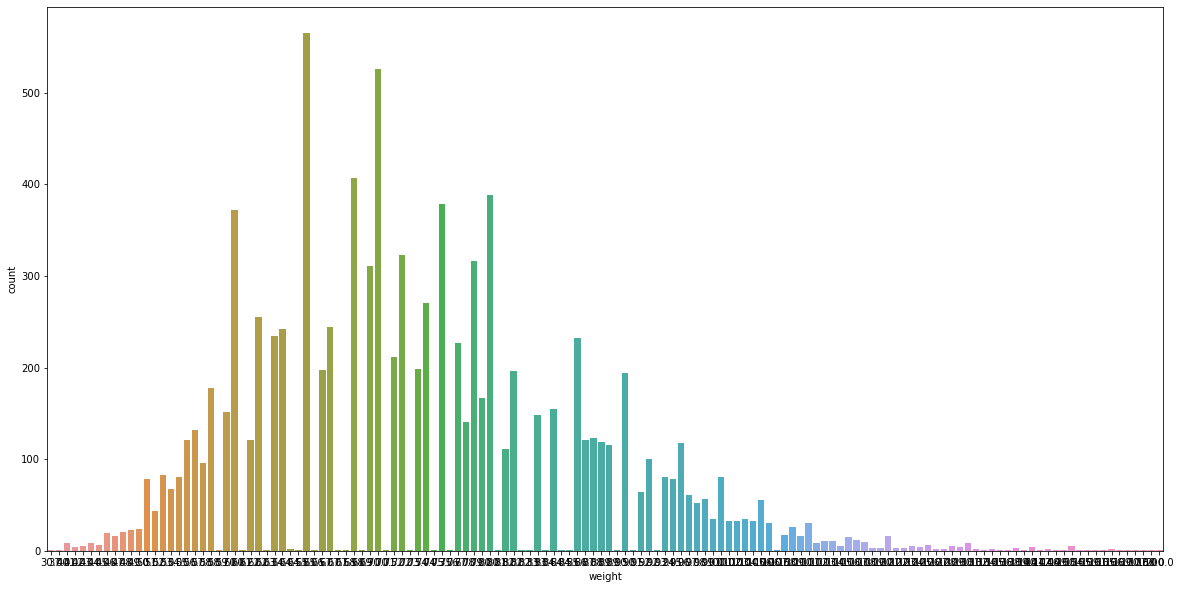

In [13]:
fig=plt.figure(figsize=(20,10))
sns.countplot(cvd['weight'],label="count")

In [14]:
print(cvd.groupby('ap_hi').size())

ap_hi
-100      1
 1        1
 7        1
 10       1
 11       5
         ..
 902      1
 906      1
 909      1
 1420     1
 11500    1
Length: 96, dtype: int64


<AxesSubplot:xlabel='ap_hi', ylabel='count'>

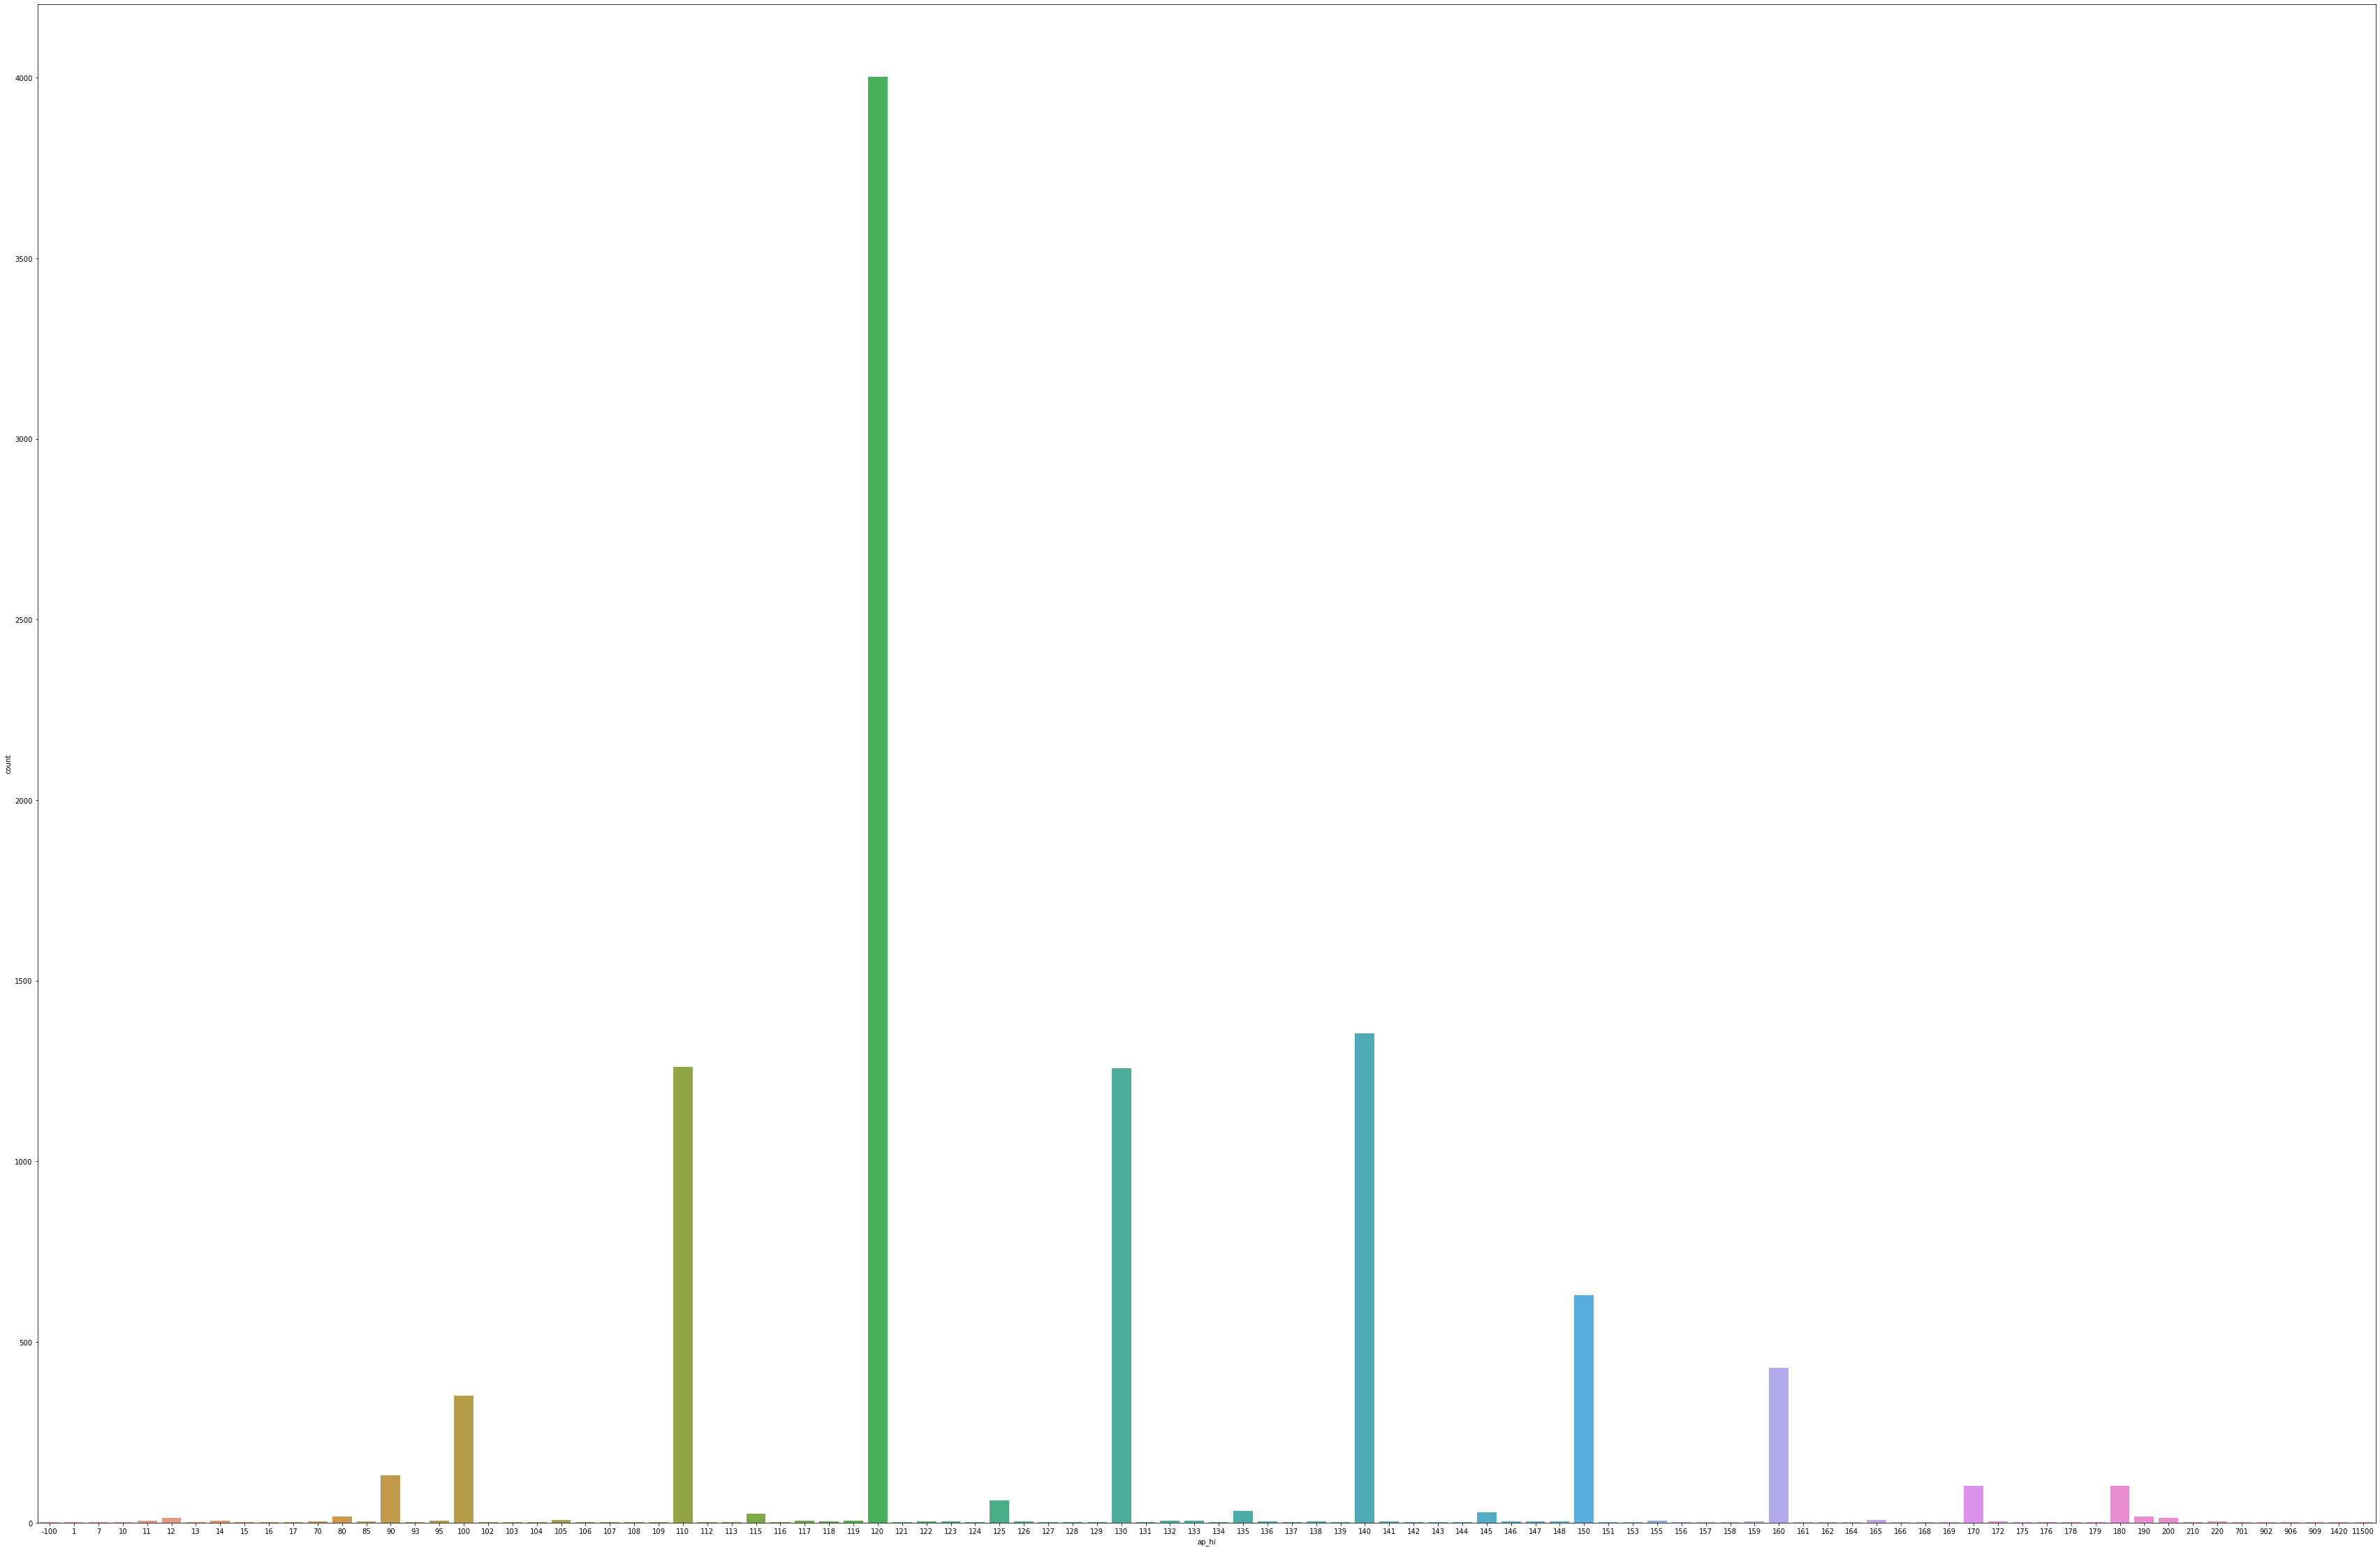

In [15]:
fig=plt.figure(figsize=(60,40))
sns.countplot(cvd['ap_hi'],label="count")

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'Chol'}>],
       [<AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

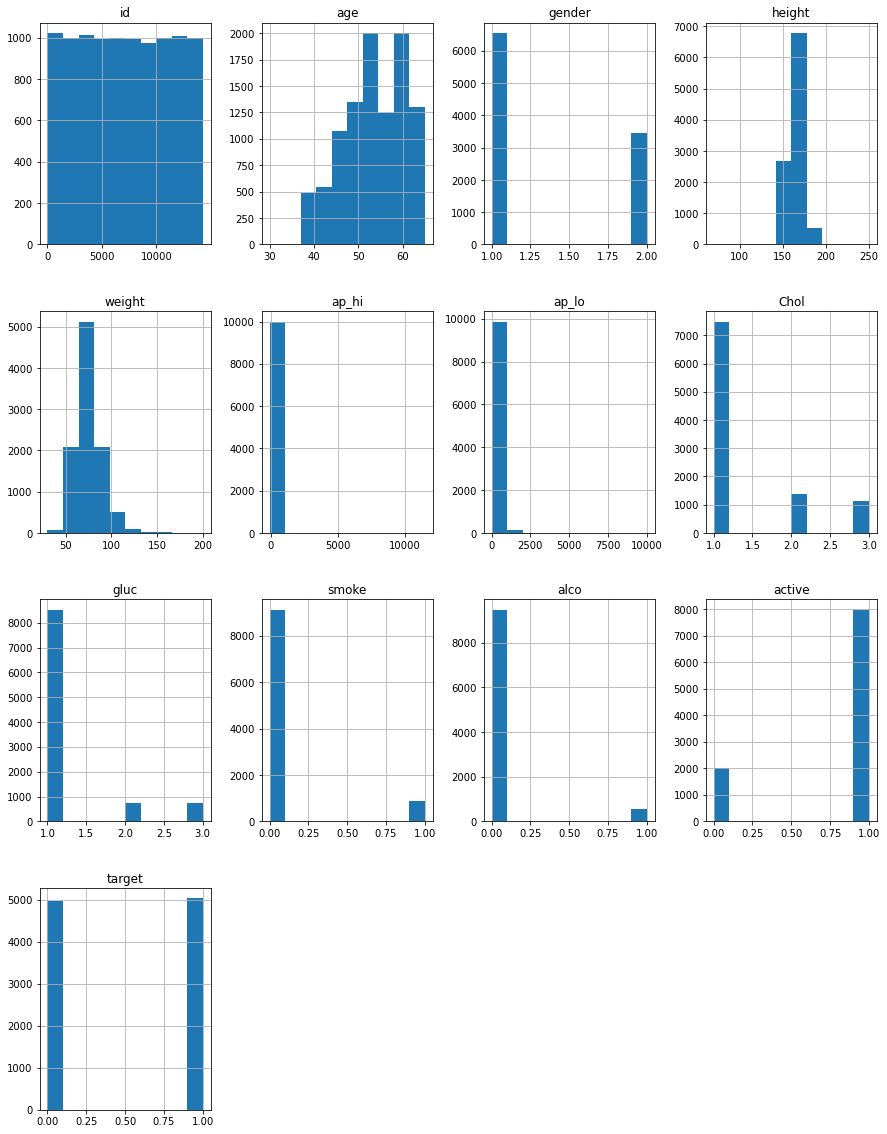

In [16]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
cvd.hist(ax=ax)

<AxesSubplot:>

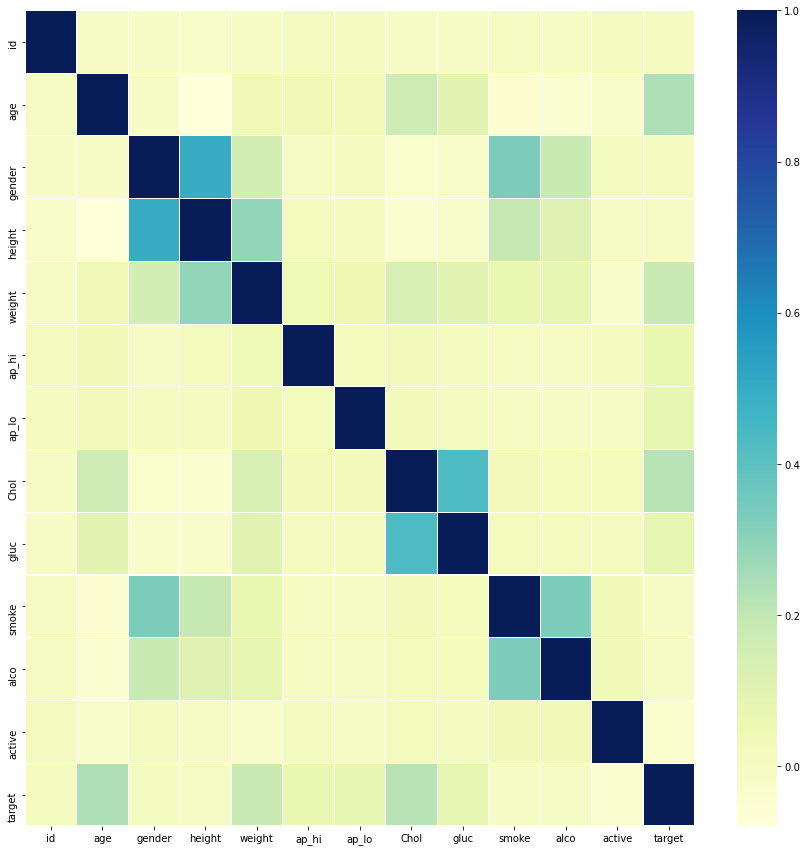

In [17]:
corrmat = cvd.corr()
f, ax = plt.subplots(figsize =(15, 15))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# SPLITTING THE DATA SET

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cvd.loc[:, cvd.columns != 'target'], cvd['target'], stratify=cvd['target'], random_state=66)

# KNN Algorithm

In [19]:
y = cvd['target']
X = cvd.drop(['target'], axis = 1)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [22]:
score.mean()

0.49640000000000006

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.703
Test set score: 0.689


In [24]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.708
Test set accuracy: 0.689


In [25]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.699
Test set accuracy: 0.684


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.629


In [27]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.727
Accuracy on test set: 0.724


In [28]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.10465938 0.         0.         0.         0.81922268
 0.         0.07611794 0.         0.         0.         0.        ]


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.713


In [30]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.729
Accuracy on test set: 0.726


In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 0.983
Accuracy on test set: 0.704


In [32]:
X_test

,id,age,gender,height,weight,ap_hi,ap_lo,Chol,gluc,smoke,alco,active
1706,2411,64,1,157,80.0,120,80,2,1,0,0,1
9223,13142,46,1,160,65.0,130,90,2,2,0,0,0
4329,6109,40,1,154,63.0,150,100,1,1,0,0,1
3678,5199,50,2,172,75.0,120,80,1,1,0,1,1
4169,5891,52,2,177,87.0,110,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5670,8058,50,2,183,80.0,110,70,1,1,0,0,1
3334,4705,58,1,155,96.0,120,80,2,1,0,0,1
4314,6086,52,1,155,90.0,150,100,1,1,0,0,1
9481,13509,58,1,178,87.0,150,90,1,1,0,0,1


In [33]:
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

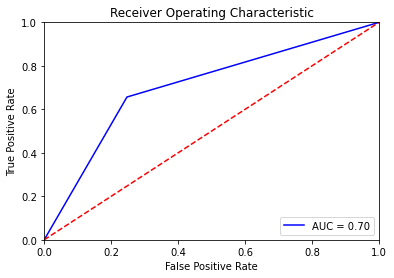

In [36]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machine

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.51
Accuracy on test set: 0.51


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.66
Accuracy on test set: 0.57


In [39]:
X_test

,id,age,gender,height,weight,ap_hi,ap_lo,Chol,gluc,smoke,alco,active
1706,2411,64,1,157,80.0,120,80,2,1,0,0,1
9223,13142,46,1,160,65.0,130,90,2,2,0,0,0
4329,6109,40,1,154,63.0,150,100,1,1,0,0,1
3678,5199,50,2,172,75.0,120,80,1,1,0,1,1
4169,5891,52,2,177,87.0,110,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5670,8058,50,2,183,80.0,110,70,1,1,0,0,1
3334,4705,58,1,155,96.0,120,80,2,1,0,0,1
4314,6086,52,1,155,90.0,150,100,1,1,0,0,1
9481,13509,58,1,178,87.0,150,90,1,1,0,0,1


In [40]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# REAL TIME PREDICTION OF CVD

In [41]:
new_input = [[1,55,1,156,85,140,90,3,1,0,0,1]]
# get prediction for new input
new_output = classifier.predict(new_input)
# summarize input and output
print(new_output);
if (new_output == 0):
 print("THE PATIENT DOES NOT HAVE 'CARDIOVASCULAR DISEASES'")  
else :
 print("THE PATIENT HAS 'CARDIOVASCULAR DISEASES'")

[1]
THE PATIENT HAS 'CARDIOVASCULAR DISEASES'
